# Considering the Valve Condition as Target Variable:


##### This notebook considers valve condition as target variable and uses feature selection methods to select top features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis,skew,iqr   
import plotly.express as px

sns.set_style("darkgrid")

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('../data/processed_data/final_df.csv')

In [3]:
df_target=pd.read_csv('../data/processed_data/target_df.csv')

In [4]:
df

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0     160.673492      156.25   145.83   191.51  13.939309      0.495566   
1     160.603320      156.06   145.73   191.47  14.118967      0.460174   
2     160.347720      155.72   145.37   191.41  14.192619      0.464134   
3     160.188088      155.56   145.14   191.34  14.227803      0.470640   
4     160.000472      155.34   144.95   191.41  14.276434      0.481844   
...          ...         ...      ...      ...        ...           ...   
2200  161.227572      156.59   146.69   191.81  13.987129      0.462507   
2201  161.206070      156.55   146.64   191.81  14.001418      0.458705   
2202  161.192120      156.56   146.63   191.84  13.988350      0.461996   
2203  161.208917      156.58   146.65   191.77  13.985248      0.463266   
2204  161.217128      156.60   146.57   191.69  13.984674      0.455709   

      PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...  CP_skewness  \
0         1.273048  15.1200  109.466914     129.365  ...    -0.345513   
1         1.278690  15.1300  109.354890     129.385  ...     0.402252   
2         1.282851  15.2800  109.158845     129.325  ...     0.245656   
3         1.286353  15.3100  109.064807     128.865  ...    -0.027257   
4         1.292315  15.3000  108.931434     129.000  ...    -0.482068   
...            ...      ...         ...         ...  ...          ...   
2200      1.291810  14.4300  109.779581     130.300  ...    -0.143915   
2201      1.290347  14.4500  109.787481     130.275  ...    -0.047794   
2202      1.290762  14.4300  109.756174     130.250  ...     0.045058   
2203      1.292470  14.4225  109.793884     130.300  ...    -0.041004   
2204      1.287925  14.4700  109.792177     130.340  ...     0.410573   

       CP_iqr    SE_mean  SE_median  SE_min  SE_max     SE_std  SE_kurtosis  \
0     0.52700  59.157183    68.5145     0.0  79.568  23.763984     2.339639   
1     0.12150  59.335617    68.5360     0.0  80.441  23.857918     2.322487   
2     0.03275  59.543150    68.8530     0.0  80.824  23.923381     2.338352   
3     0.03150  59.794900    69.0060     0.0  80.930  24.023005     2.338694   
4     0.03050  59.455267    69.0130     0.0  81.100  23.972262     2.268655   
...       ...        ...        ...     ...     ...        ...          ...   
2200  0.02750  59.033100    68.4505     0.0  77.752  23.635352     2.405264   
2201  0.03625  59.068000    68.4075     0.0  77.592  23.638396     2.414648   
2202  0.04525  59.132350    68.3130     0.0  77.773  23.633405     2.441802   
2203  0.02625  58.970800    68.3500     0.0  77.568  23.600817     2.413508   
2204  0.04050  59.053900    68.3705     0.0  77.748  23.627226     2.419783   

      SE_skewness  SE_iqr  
0       -2.030801   1.232  
1       -2.022689   1.496  
2       -2.027789   1.556  
3       -2.028969   1.283  
4       -2.000267   1.477  
...           ...     ...  
2200    -2.055932   1.399  
2201    -2.059495   1.223  
2202    -2.069487   1.298  
2203    -2.059104   1.220  
2204    -2.061135   1.255  

[2205 rows x 136 columns]

In [5]:
df_target

Cooler condition / %   Valve condition / %  Internal pump leakage  \
0                        3                   100                      0   
1                        3                   100                      0   
2                        3                   100                      0   
3                        3                   100                      0   
4                        3                   100                      0   
...                    ...                   ...                    ...   
2200                   100                   100                      0   
2201                   100                   100                      0   
2202                   100                   100                      0   
2203                   100                   100                      0   
2204                   100                   100                      0   

      Hydraulic accumulator / bar  stable flag  
0                             130            1  
1                             130            1  
2                             130            1  
3                             130            1  
4                             130            1  
...                           ...          ...  
2200                           90            0  
2201                           90            0  
2202                           90            0  
2203                           90            0  
2204                           90            0  

[2205 rows x 5 columns]

In [6]:
df_valve= pd.concat([df,df_target[' Valve condition / %']],axis=1)

In [7]:
df_valve.head()

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0  160.673492      156.25   145.83   191.51  13.939309      0.495566   
1  160.603320      156.06   145.73   191.47  14.118967      0.460174   
2  160.347720      155.72   145.37   191.41  14.192619      0.464134   
3  160.188088      155.56   145.14   191.34  14.227803      0.470640   
4  160.000472      155.34   144.95   191.41  14.276434      0.481844   

   PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...   CP_iqr    SE_mean  \
0      1.273048    15.12  109.466914     129.365  ...  0.52700  59.157183   
1      1.278690    15.13  109.354890     129.385  ...  0.12150  59.335617   
2      1.282851    15.28  109.158845     129.325  ...  0.03275  59.543150   
3      1.286353    15.31  109.064807     128.865  ...  0.03150  59.794900   
4      1.292315    15.30  108.931434     129.000  ...  0.03050  59.455267   

   SE_median  SE_min  SE_max     SE_std  SE_kurtosis  SE_skewness  SE_iqr  \
0    68.5145     0.0  79.568  23.763984     2.339639    -2.030801   1.232   
1    68.5360     0.0  80.441  23.857918     2.322487    -2.022689   1.496   
2    68.8530     0.0  80.824  23.923381     2.338352    -2.027789   1.556   
3    69.0060     0.0  80.930  24.023005     2.338694    -2.028969   1.283   
4    69.0130     0.0  81.100  23.972262     2.268655    -2.000267   1.477   

    Valve condition / %  
0                   100  
1                   100  
2                   100  
3                   100  
4                   100  

[5 rows x 137 columns]

In [8]:
df_valve[' Valve condition / %']=df_valve[' Valve condition / %'].astype('category')

In [9]:
df_valve[' Valve condition / %']=df_valve[' Valve condition / %'].map({100:'optimal switching',90:'small lag',
                                                                      80:'sever lag',73:'close to failure'})

In [10]:
df_valve[' Valve condition / %'].value_counts()

optimal switching    1125
close to failure      360
sever lag             360
small lag             360
Name:  Valve condition / %, dtype: int64

In [11]:
def feature_scaling(df,target):
    '''Preprocessing and Feature Scaling
    Parameters:
    df: Dataframe with features and defect that needs to be scaled
    Output:Returns two data frames X(features) and y(labels)'''
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import numpy as np
    
    # preprocessing using standard scaler
    scaler=StandardScaler()
    
    # Dividing data into features(X) and labels(y)
    X=df.drop(target,axis=1)
    y=df[target]
    
    #Scaling features by using StandardScaler
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y

In [12]:
X,y = feature_scaling(df_valve,' Valve condition / %')

In [13]:
from sklearn.feature_selection import f_classif,SelectKBest,mutual_info_classif

In [14]:
select_model=SelectKBest(f_classif,k='all')

In [15]:
select_model.fit(X,y)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  18 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [16]:
feature_score=pd.DataFrame({'Feature':X.columns,'Importance':select_model.scores_}).sort_values(by='Importance',ascending=False)

In [17]:
feature_score.describe()

Importance
count  133.000000
mean    10.656399
std     16.309130
min      0.003862
25%      0.559160
50%      2.484025
75%     18.439549
max    104.295122

In [18]:
treshold=feature_score['Importance'].mean()
feature_score_top=feature_score[feature_score['Importance']>treshold]

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


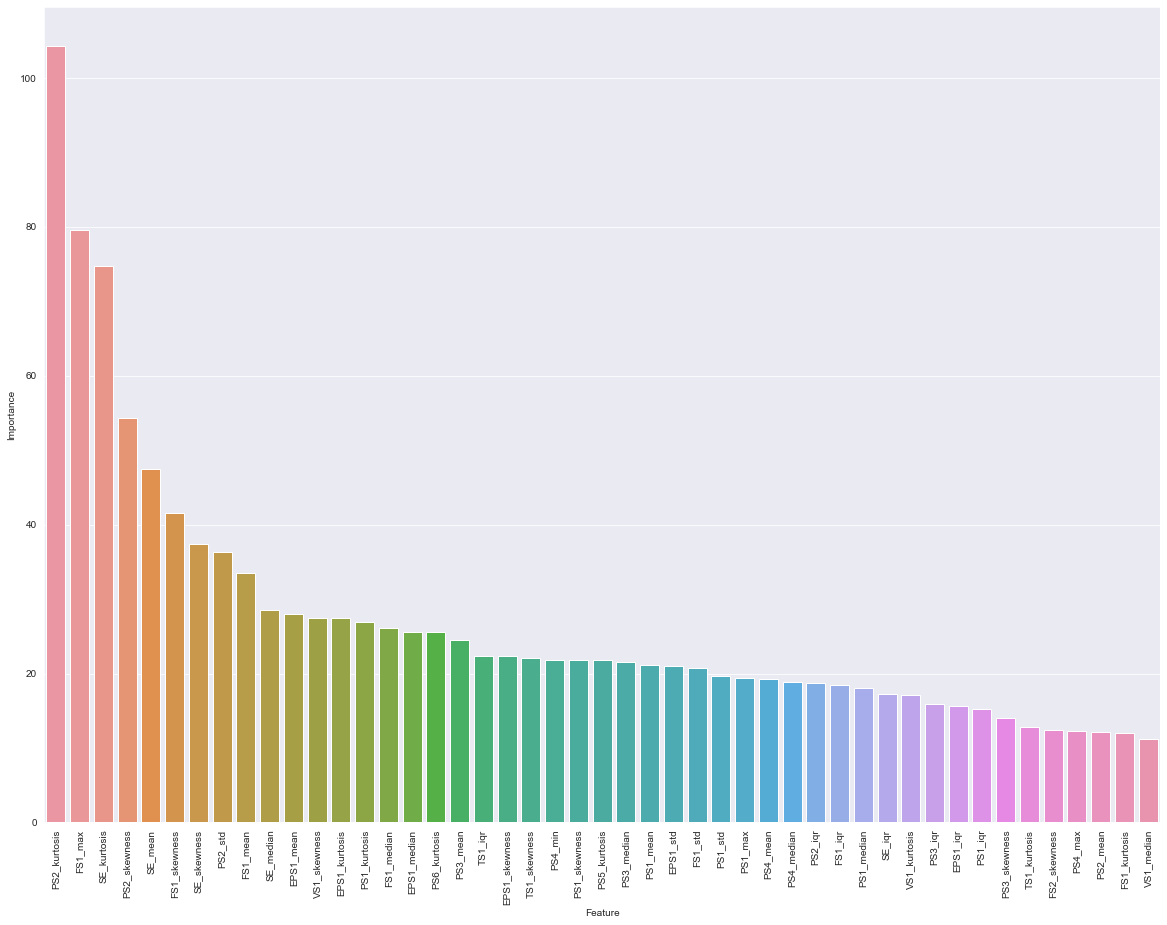

In [19]:
plt.figure(figsize=(20,15))
sns.barplot(feature_score_top['Feature'],feature_score_top['Importance'])
plt.xticks(rotation=90);

In [20]:
df_valve_anova = df_valve[feature_score_top.Feature]
df_valve_anova[' Valve condition / %']=df_valve[' Valve condition / %']

<ipython-input-20-fe9e6e66a704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valve_anova[' Valve condition / %']=df_valve[' Valve condition / %']


In [21]:
df_valve_anova

PS2_kurtosis  FS1_max  SE_kurtosis  PS2_skewness    SE_mean  \
0         1.508854   18.710     2.339639     -1.837853  59.157183   
1         1.511086   18.712     2.322487     -1.838351  59.335617   
2         1.508480   18.698     2.338352     -1.837545  59.543150   
3         1.507613   18.896     2.338694     -1.837120  59.794900   
4         1.509724   18.876     2.268655     -1.837496  59.455267   
...            ...      ...          ...           ...        ...   
2200      1.517597   20.228     2.405264     -1.840745  59.033100   
2201      1.518219   20.308     2.414648     -1.840538  59.068000   
2202      1.517554   20.071     2.441802     -1.840918  59.132350   
2203      1.520136   20.280     2.413508     -1.841324  58.970800   
2204      1.519674   20.395     2.419783     -1.840878  59.053900   

      FS1_skewness  SE_skewness    PS2_std  FS1_mean  SE_median  ...  \
0        -1.399797    -2.030801  47.114508  6.709815    68.5145  ...   
1        -1.446472    -2.022689  47.045611  6.715315    68.5360  ...   
2        -1.431863    -2.027789  46.992060  6.718522    68.8530  ...   
3        -1.406670    -2.028969  46.972221  6.720565    69.0060  ...   
4        -1.422662    -2.000267  46.874946  6.690308    69.0130  ...   
...            ...          ...        ...       ...        ...  ...   
2200     -1.387100    -2.055932  47.253414  6.689930    68.4505  ...   
2201     -1.380469    -2.059495  47.247815  6.692182    68.4075  ...   
2202     -1.410821    -2.069487  47.244805  6.693277    68.3130  ...   
2203     -1.382422    -2.059104  47.240806  6.684128    68.3500  ...   
2204     -1.372759    -2.061135  47.238665  6.692302    68.3705  ...   

      EPS1_iqr  PS1_iqr  PS3_skewness  TS1_kurtosis  FS2_skewness  PS4_max  \
0        209.0  15.1200     -0.373579     -1.334003     -0.316691    0.000   
1        210.0  15.1300     -0.312814     -1.349416     -0.000509    0.000   
2        211.8  15.2800     -0.196023     -1.236851      0.073871    0.000   
3        210.0  15.3100     -0.166201     -1.115968      0.269416    0.000   
4        208.8  15.3000      0.017992     -1.194279      0.275750    0.000   
...        ...      ...           ...           ...           ...      ...   
2200     200.0  14.4300     -0.668354     -0.749753     -0.060554   10.264   
2201     201.6  14.4500     -0.654306     -0.498639     -0.039883   10.255   
2202     201.0  14.4300     -0.612730     -0.869560     -0.187083   10.255   
2203     200.2  14.4225     -0.677827     -0.812144     -0.373477   10.257   
2204     201.4  14.4700     -0.659134     -0.776221     -0.303921   10.262   

        PS2_mean  FS1_kurtosis  VS1_median   Valve condition / %  
0     109.466914      1.661736      0.5770     optimal switching  
1     109.354890      1.637921      0.5595     optimal switching  
2     109.158845      1.624573      0.5620     optimal switching  
3     109.064807      1.655717      0.5550     optimal switching  
4     108.931434      1.619443      0.5760     optimal switching  
...          ...           ...         ...                   ...  
2200  109.779581      1.914197      0.5485     optimal switching  
2201  109.787481      1.931628      0.5425     optimal switching  
2202  109.756174      1.925117      0.5440     optimal switching  
2203  109.793884      1.926283      0.5350     optimal switching  
2204  109.792177      1.949974      0.5405     optimal switching  

[2205 rows x 48 columns]

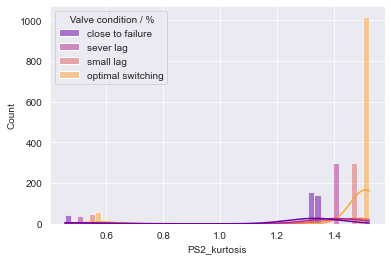

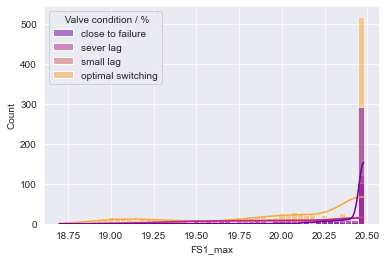

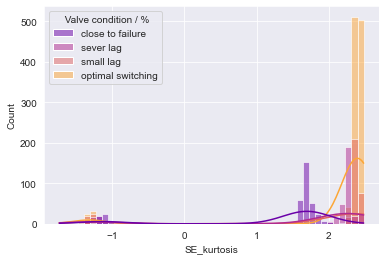

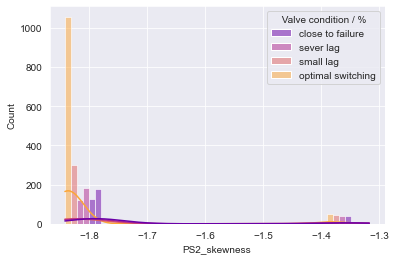

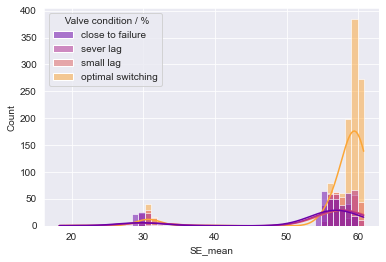

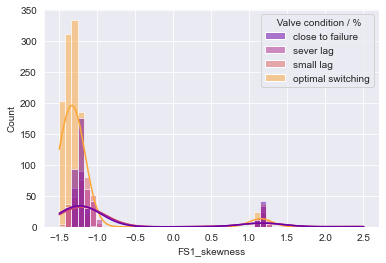

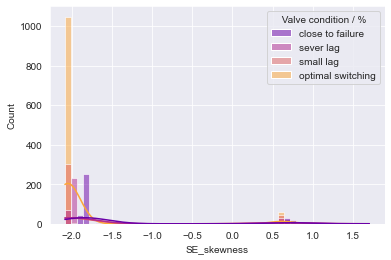

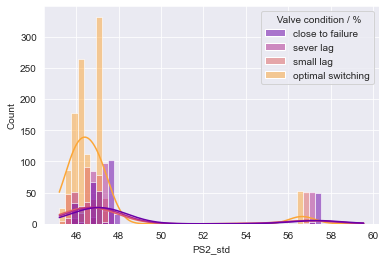

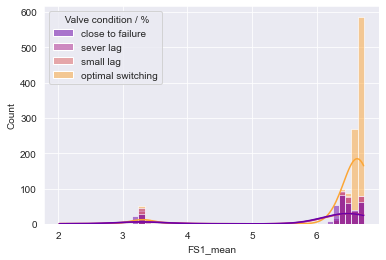

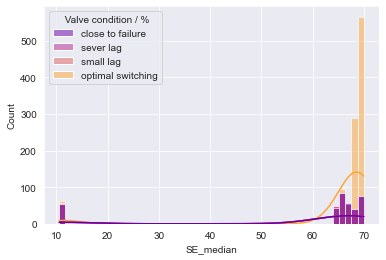

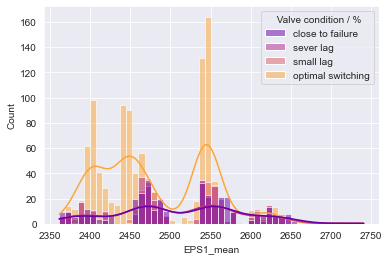

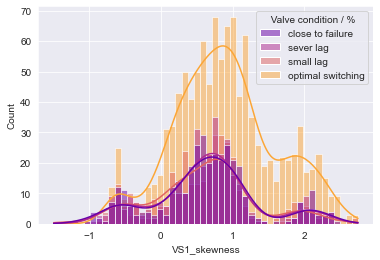

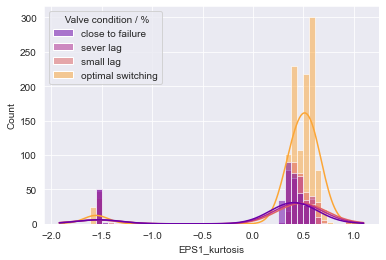

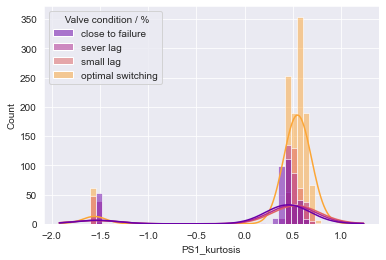

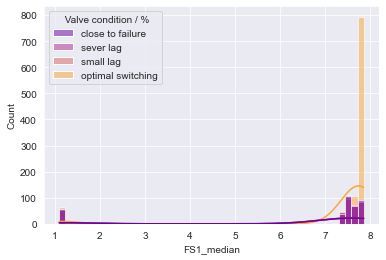

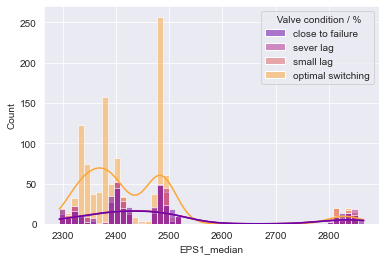

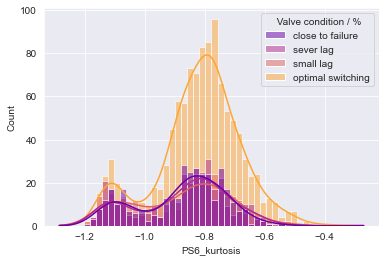

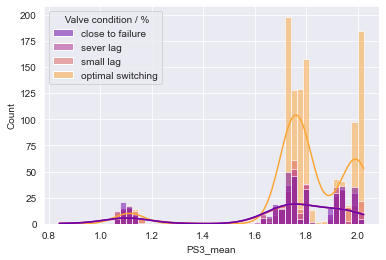

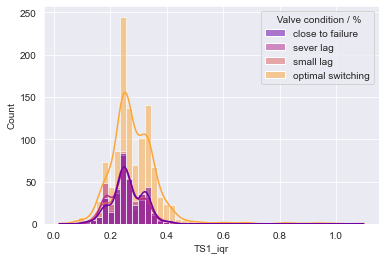

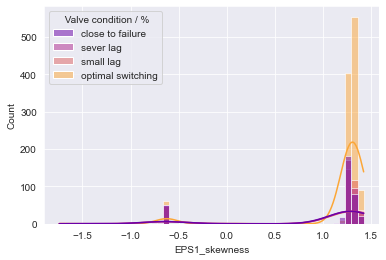

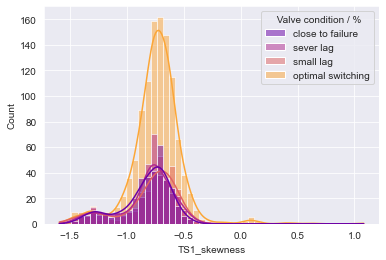

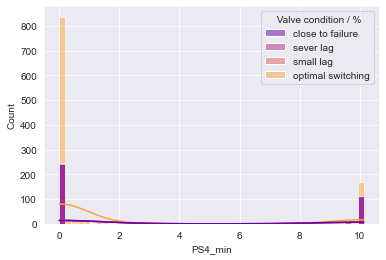

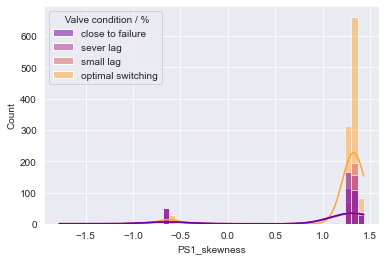

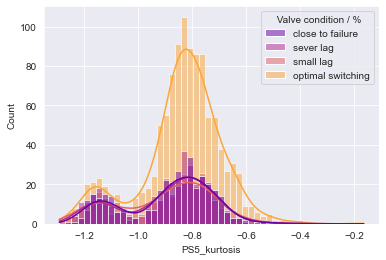

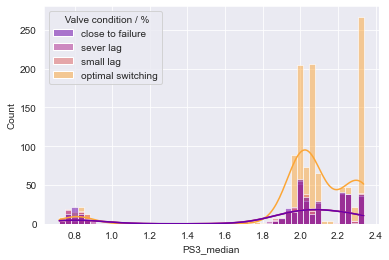

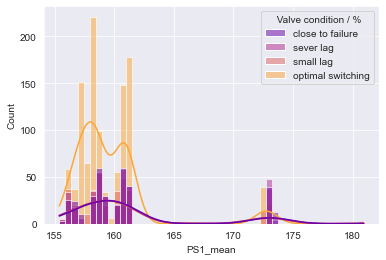

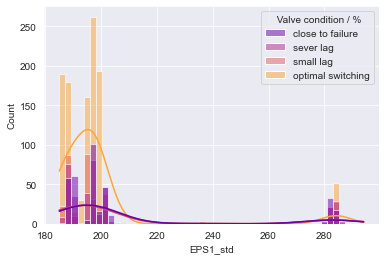

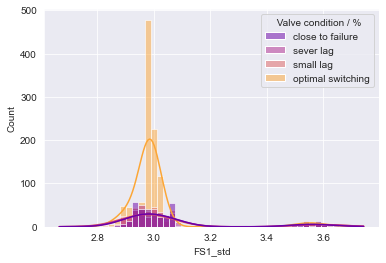

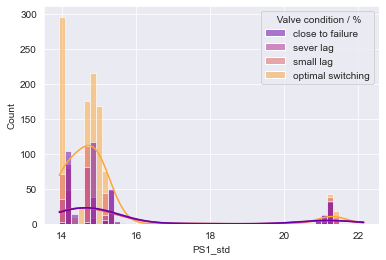

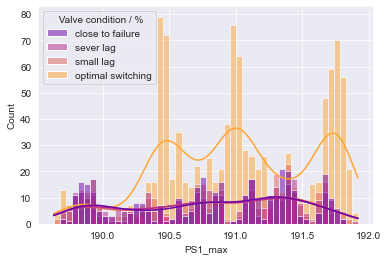

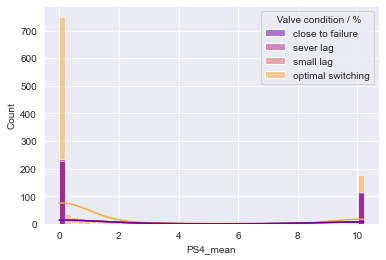

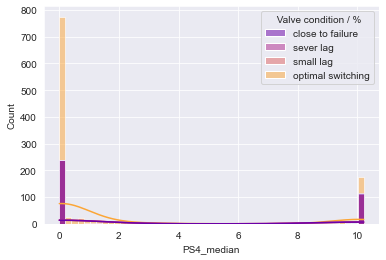

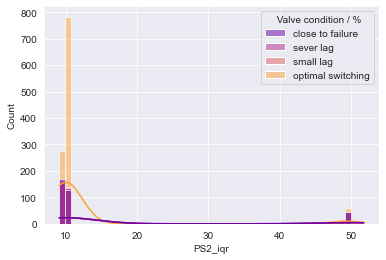

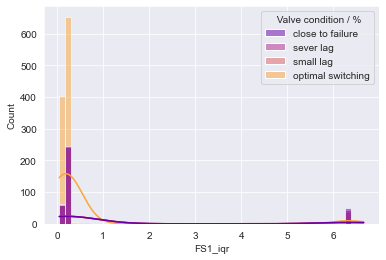

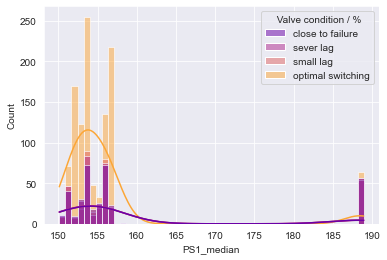

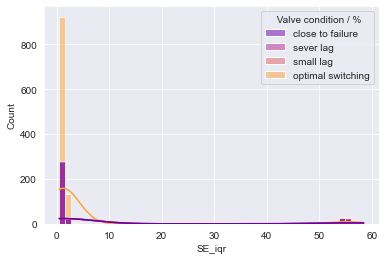

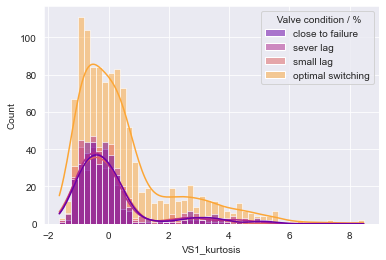

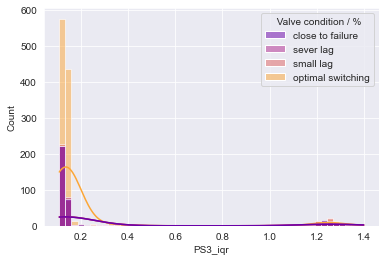

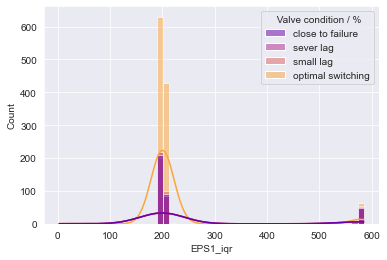

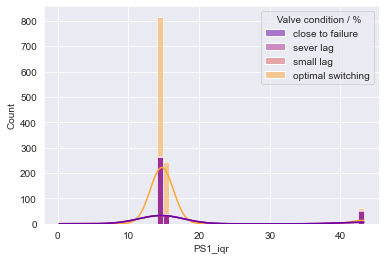

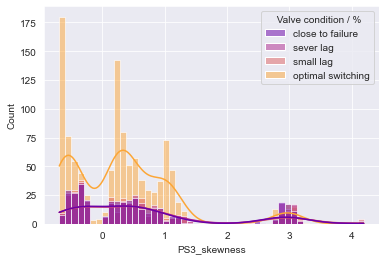

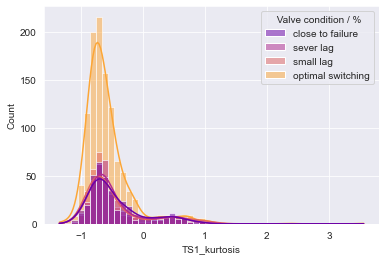

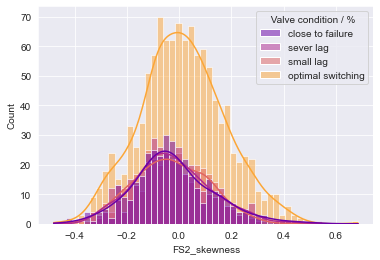

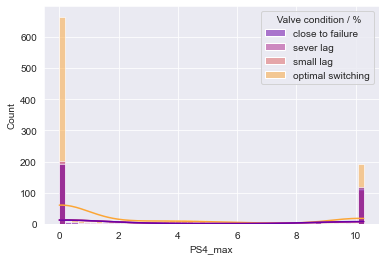

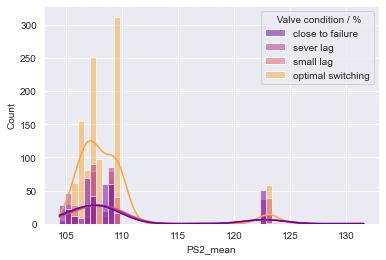

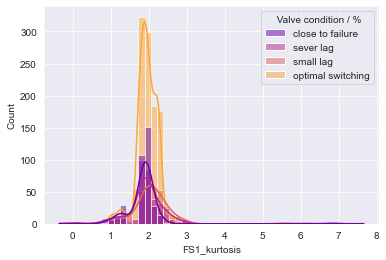

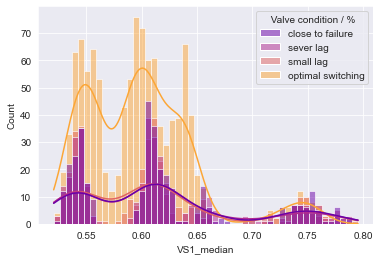

In [22]:
# Plotting Distributions of each feature 

for i in df_valve_anova.drop(' Valve condition / %',axis=1).columns:
    sns.histplot(data=df_valve_anova,x=i,hue=' Valve condition / %',kde=True,bins=50,palette='plasma')
    plt.show()

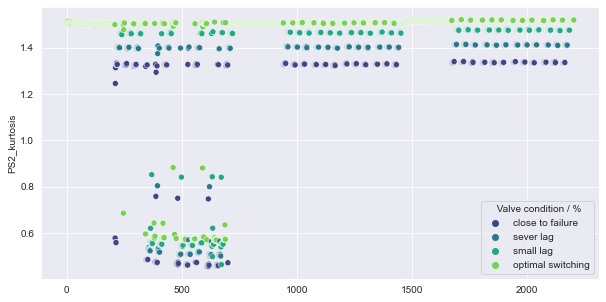

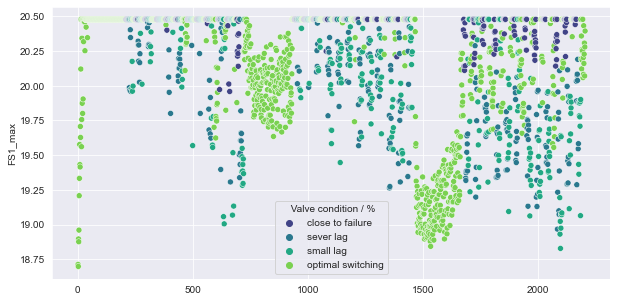

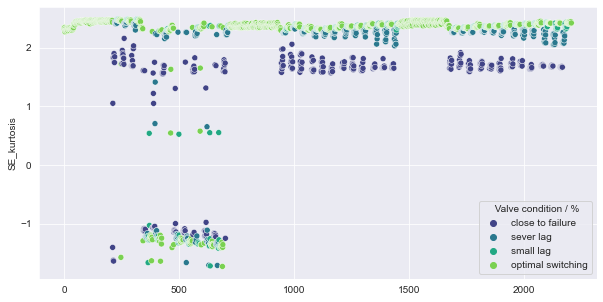

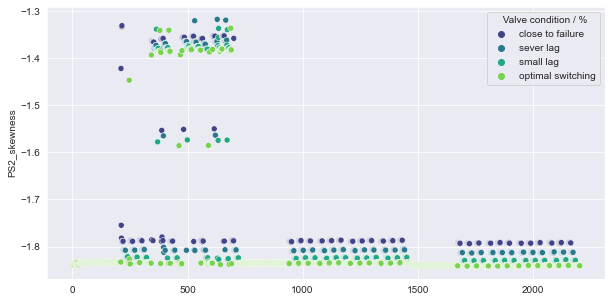

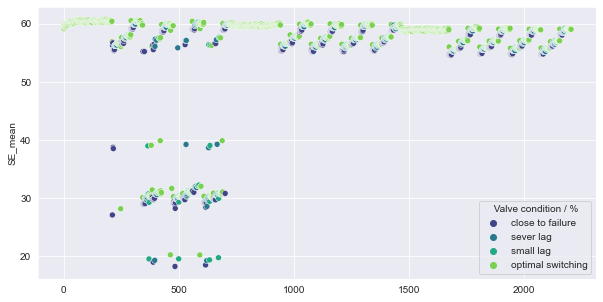

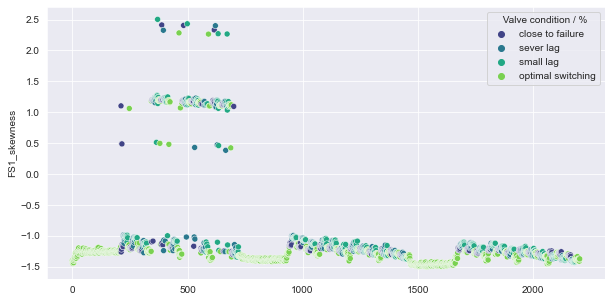

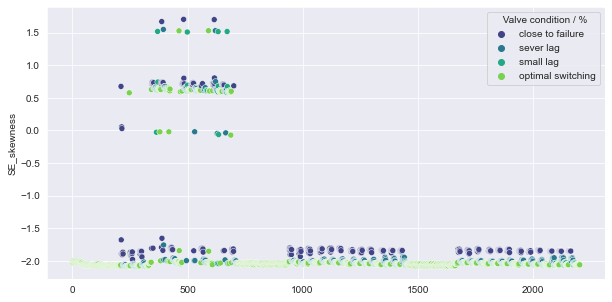

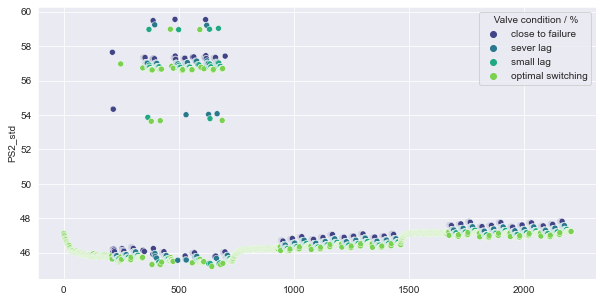

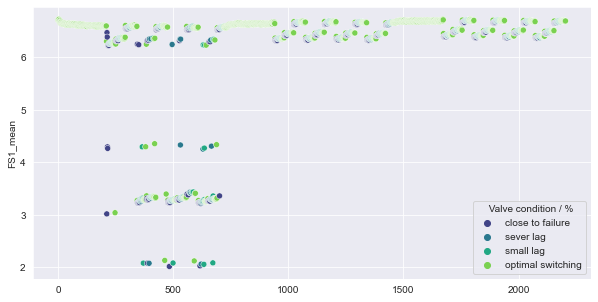

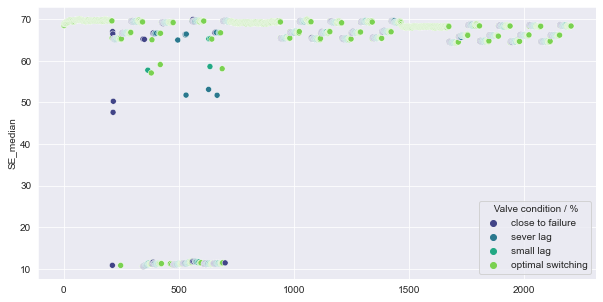

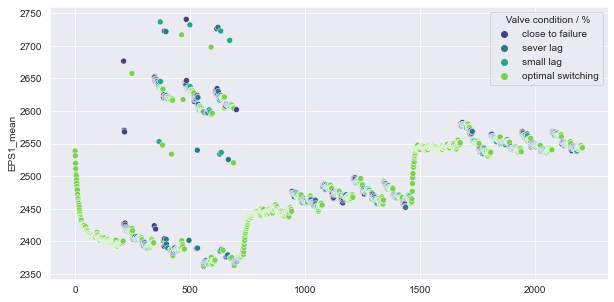

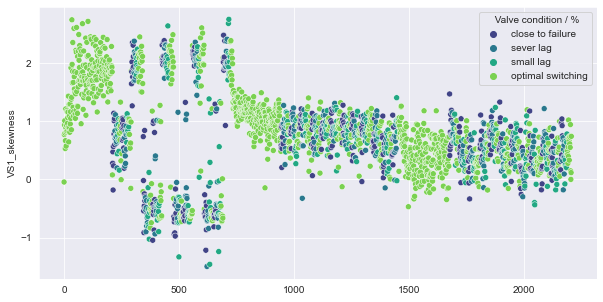

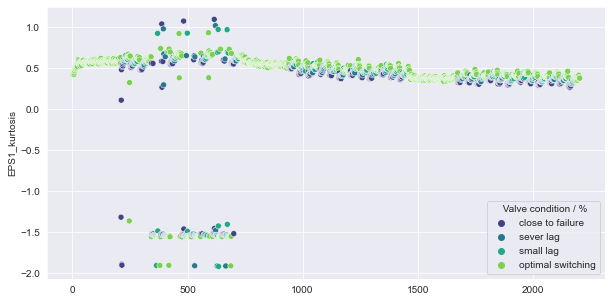

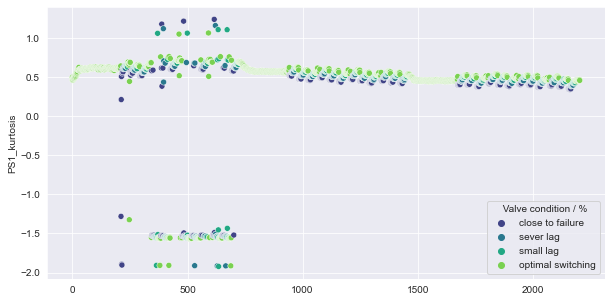

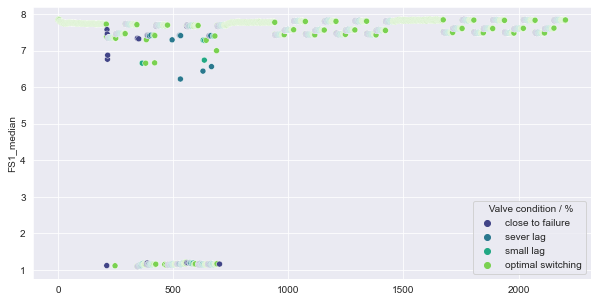

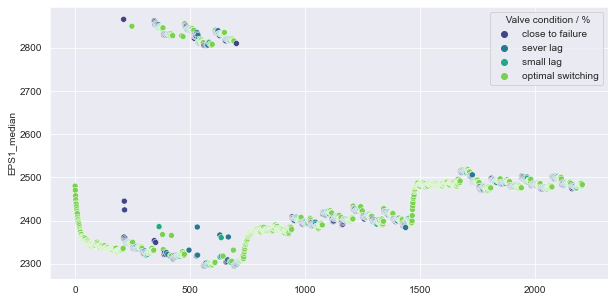

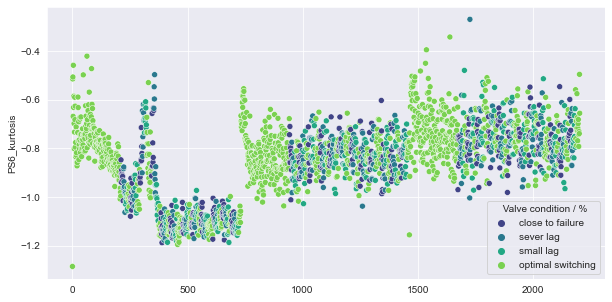

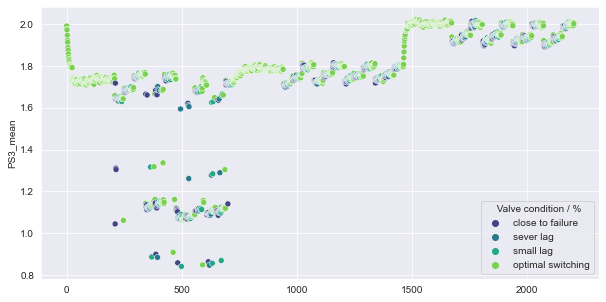

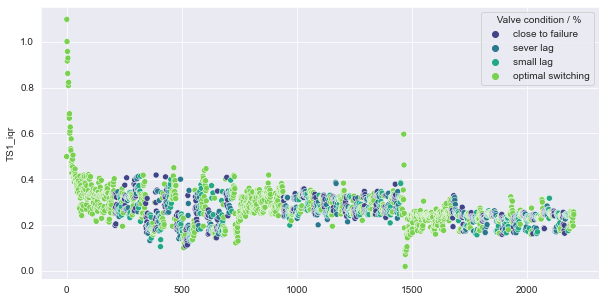

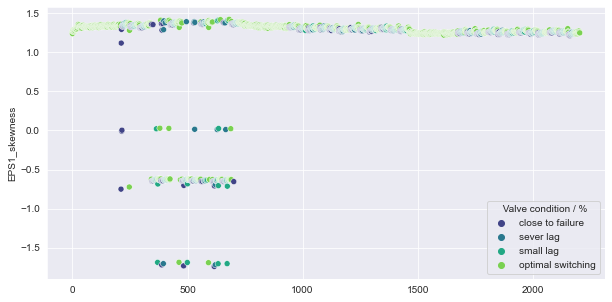

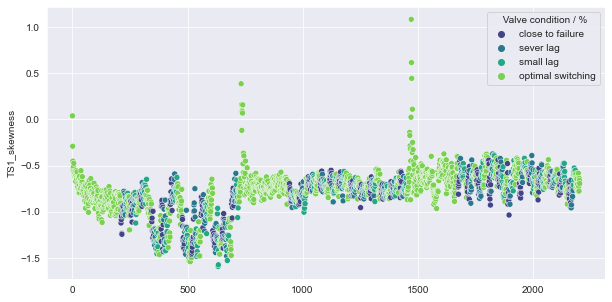

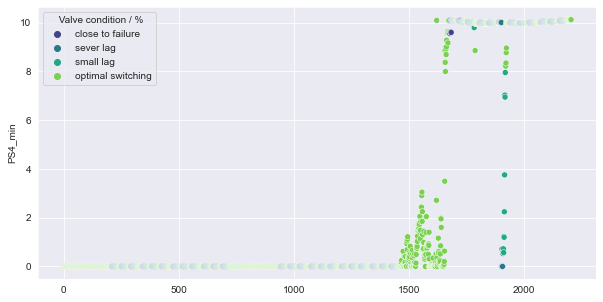

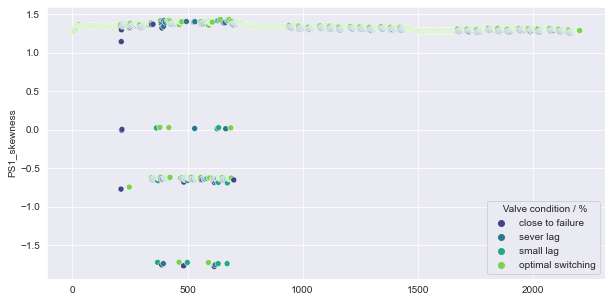

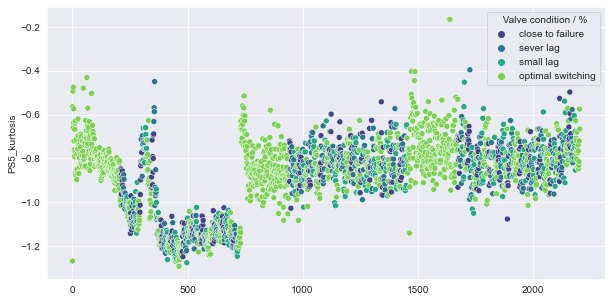

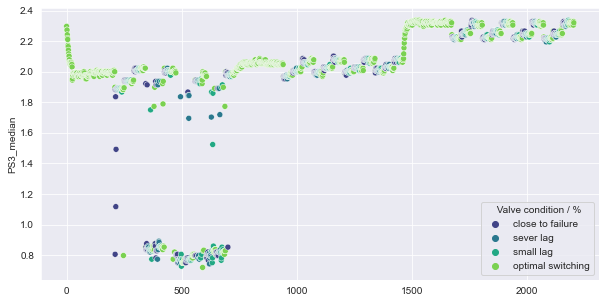

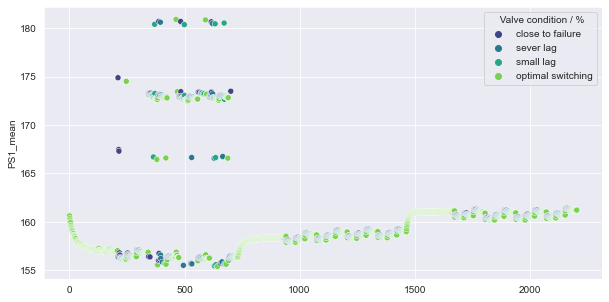

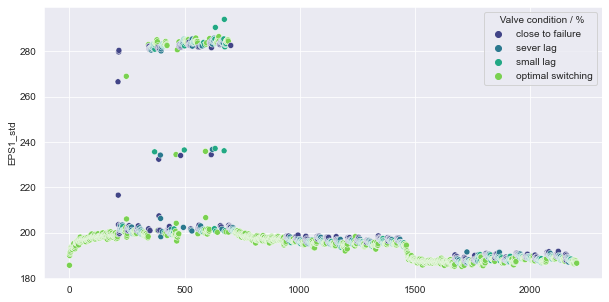

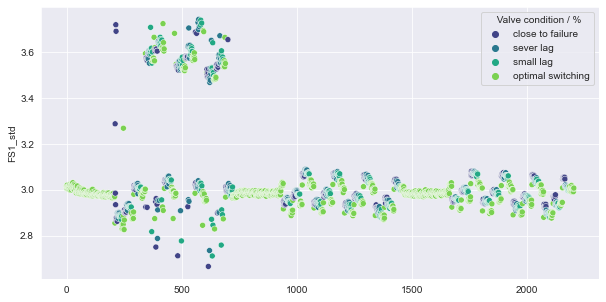

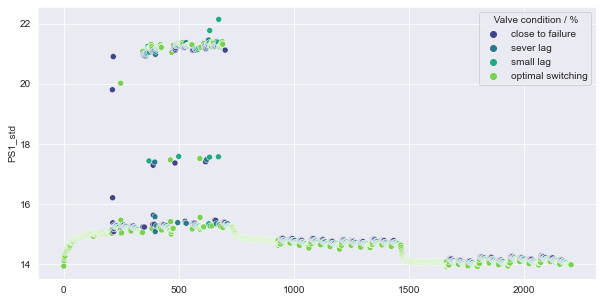

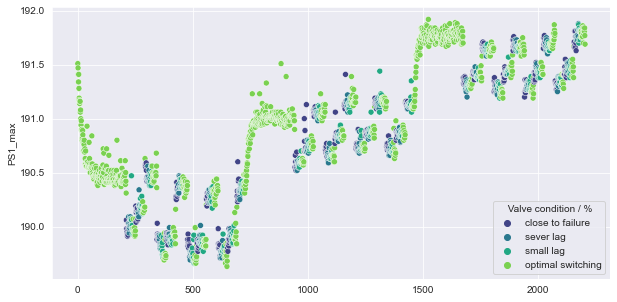

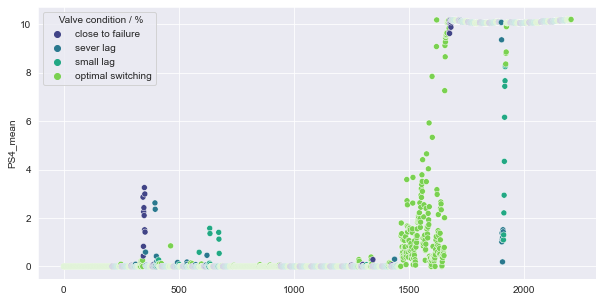

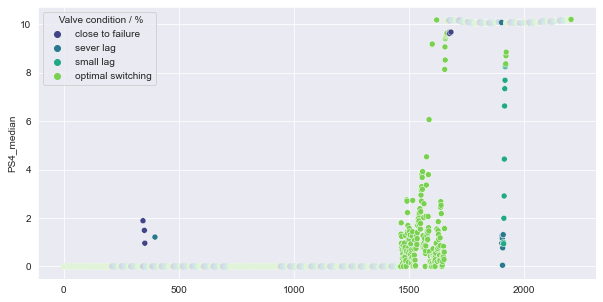

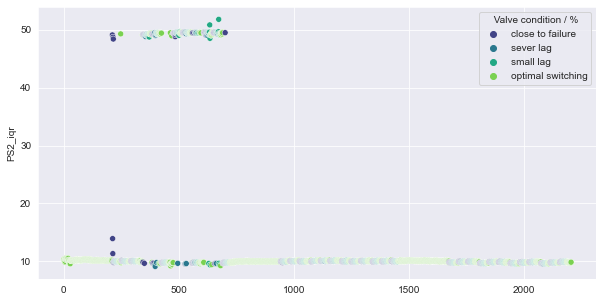

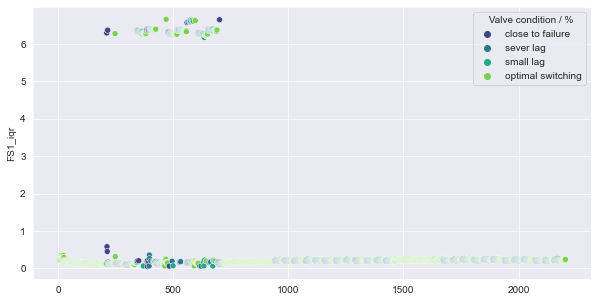

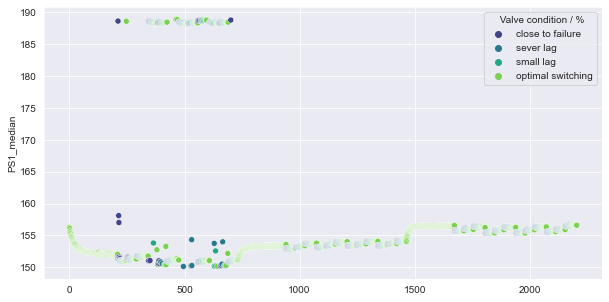

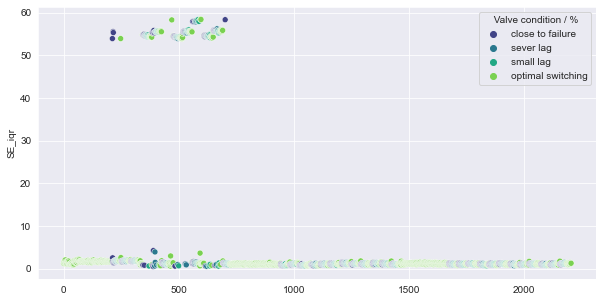

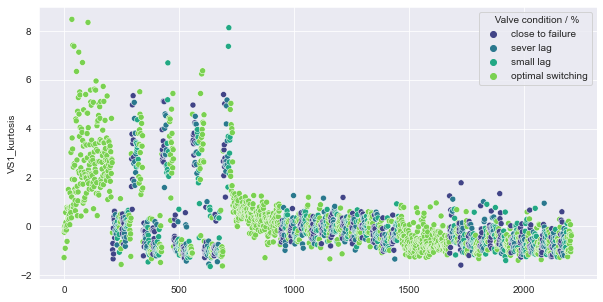

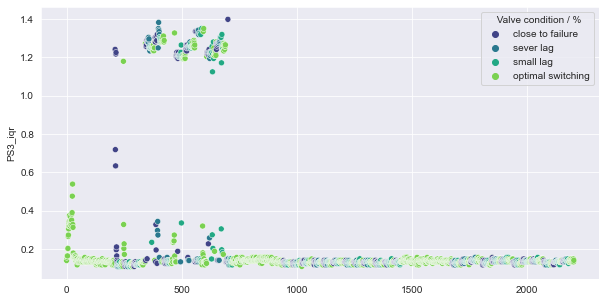

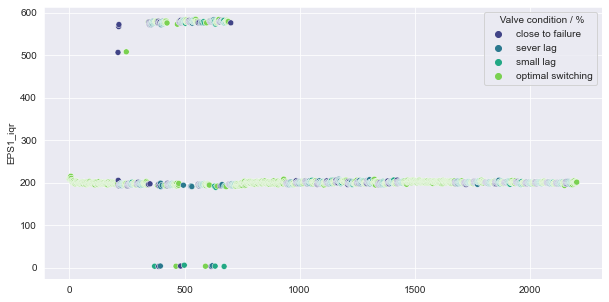

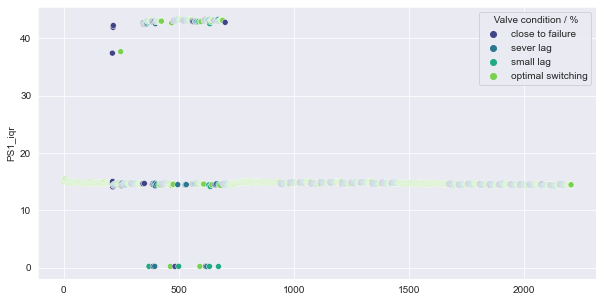

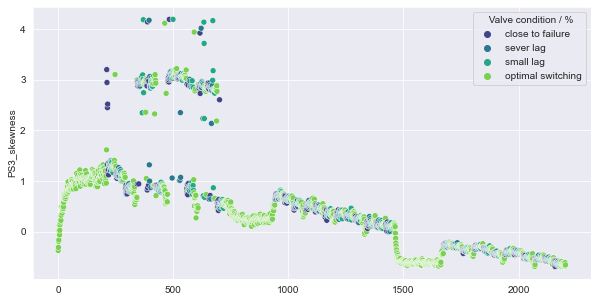

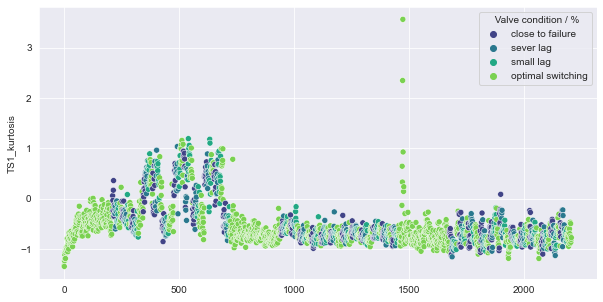

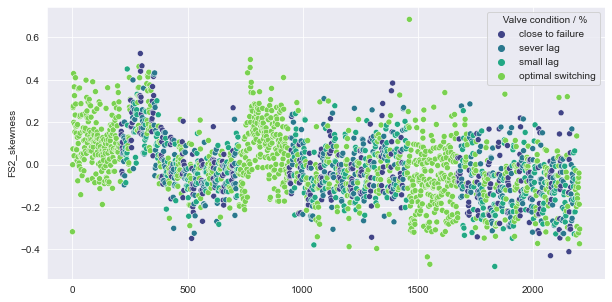

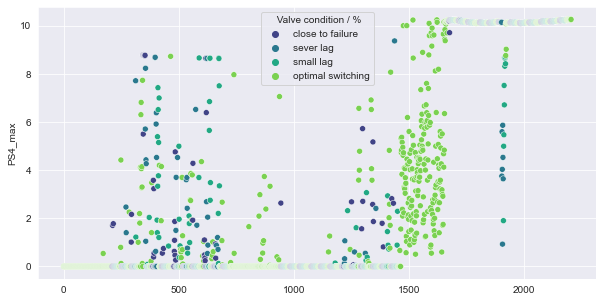

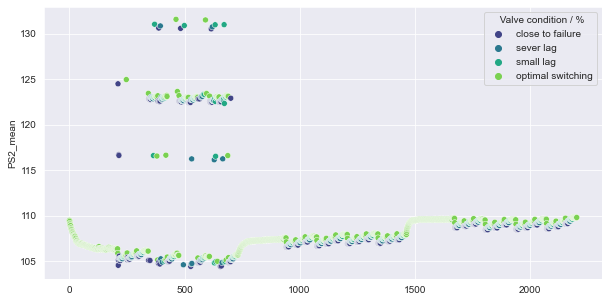

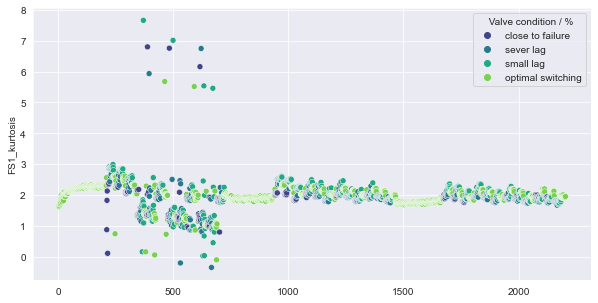

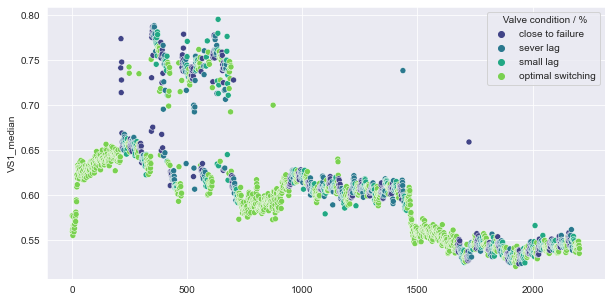

In [23]:

for i in df_valve_anova.drop(' Valve condition / %',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_valve_anova,y=i,x=df_valve_anova.index,hue=' Valve condition / %',palette='viridis')
    plt.show()

#### Kendall's Feature Selection

In [24]:
from scipy.stats import kendalltau

In [25]:
tau_values=[]
for i in X.columns:
    tau, p_value = kendalltau(X[i], y)
    tau_values.append(tau)

In [26]:
df_tau=pd.DataFrame()

In [27]:
df_tau['Features']=X.columns

In [28]:
df_tau['tau_value']=tau_values

In [29]:
df_tau['tau_value'].max()

0.13986289059338716

In [30]:
df_tau['tau_value'].min()

-0.24737145376100494

In [31]:
threshold=0.10
df_tau_strong=df_tau[(df_tau['tau_value']>threshold) | (df_tau['tau_value']<-threshold)]

In [32]:
df_tau_strong

Features  tau_value
83        FS1_max  -0.247371
85   FS1_kurtosis   0.124035
86   FS1_skewness   0.139863
132        SE_std  -0.140792

In [33]:
df_valve_tau=df_valve[df_tau_strong['Features']]
df_valve_tau[' Valve condition / %']=df_valve[' Valve condition / %']

<ipython-input-33-d7822373b172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valve_tau[' Valve condition / %']=df_valve[' Valve condition / %']


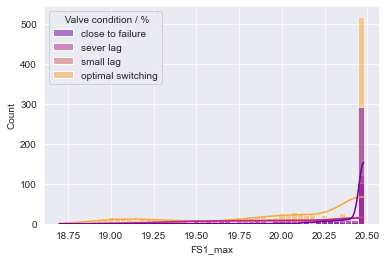

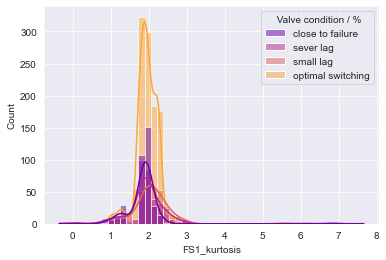

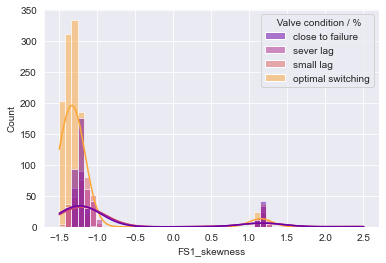

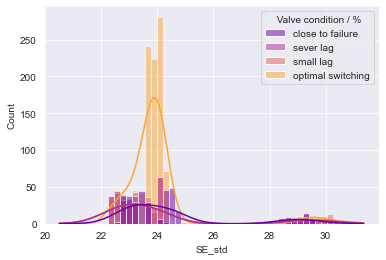

In [34]:
for i in df_valve_tau.drop(' Valve condition / %',axis=1).columns:
    sns.histplot(data=df_valve_tau,x=i,hue=' Valve condition / %',kde=True,bins=50,palette='plasma')
    plt.show()

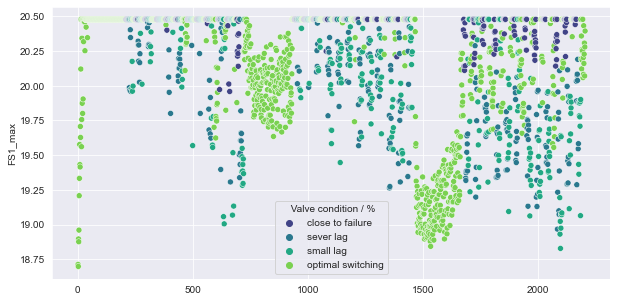

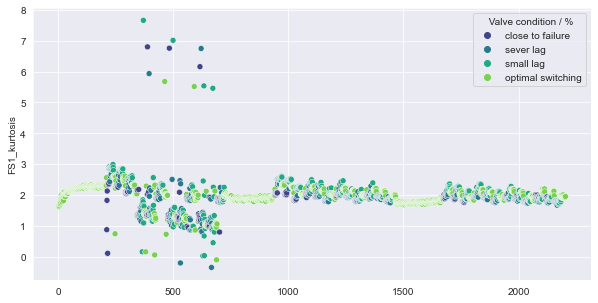

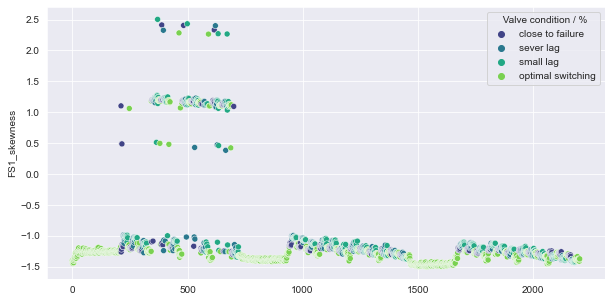

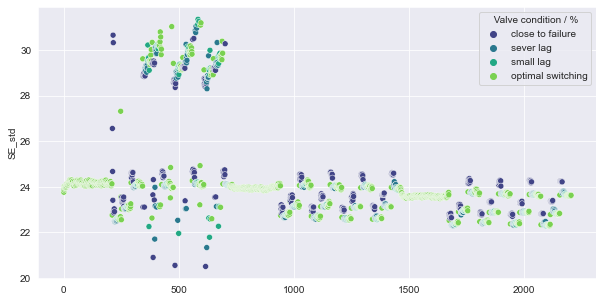

In [35]:
for i in df_valve_tau.drop(' Valve condition / %',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_valve_tau,y=i,x=df_valve_tau.index,hue=' Valve condition / %',palette='viridis')
    plt.show()

##### 1) From visualizations above, it is difficult to set a boundary condition, Therefore using machine learning algorithms to predict the conditions can yield better results in classifying hte condition of the valve

##### 2) Features selected by ANOVA  method give the features based on volume flow rate, pressure and efficiency factor, these features are relavent as the condition of a valve might be highly effected by the flow of hydraulic fluid and also the pressure. Therefore , the features based on these three sensors can be used in any classification model to build a classifier that can yield good results.

##### 3) Features selected by Kendall's method give features based on volume flow rate, Since the features related to volume flow rate considered as important features by both the selection methods, It is also seen that one of the features have a strong correlation but they either have a moderate or weak correlation with the target

###### Hence, it is observed that the distributions of features selected are not very well separated, and cannot be classified based on a certain boundary by visualizing the distribution plots, therefore, it is recommended to use machine learning algorithms to build a classifier for prediction.

## Using LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [37]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, log_loss, confusion_matrix, classification_report

In [39]:
X,y=df_valve.drop(' Valve condition / %',axis=1),df_valve[' Valve condition / %']

In [40]:
## Mapping Defects to defective(1) or non-defective(0)
y=y.map({'optimal switching':1,'small lag':0,'sever lag':0,'close to failure':0})

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Valve condition / %', ylabel='count'>

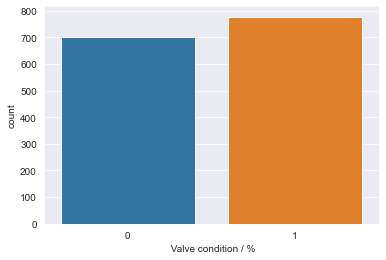

In [42]:
sns.countplot(y_train)

In [43]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr=LogisticRegression()

In [46]:
mcc_list=[]
acc_list=[]
log_list=[]
for train_idx,test_idx in cv.split(X_train,y_train):
    
    train_x,train_y=X_train.iloc[train_idx],y_train.iloc[train_idx]
    test_x,test_y=X_train.iloc[test_idx],y_train.iloc[test_idx]
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    mcc_list.append(matthews_corrcoef(test_y,pred))
    acc_list.append(accuracy_score(test_y,pred))
    log_list.append(log_loss(test_y,pred))
print(f'MCC:{np.mean(mcc_list)}')
print(f'Accuracy:{np.mean(acc_list)}')
print(f'Logloss:{np.mean(log_list)}')

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

MCC:0.5317221675592171
Accuracy:0.7664200641319285
Logloss:8.06766424221983


C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
y_hat= lr.predict(X_test)

In [48]:
mcc_score=matthews_corrcoef(y_test,y_hat)
mcc_score

0.45274629777573633

In [49]:
accuracy=accuracy_score(y_test,y_hat)
accuracy

0.7239010989010989

In [50]:
logloss=log_loss(y_test,y_hat)
logloss

9.53625220640595

In [51]:
confusion_matrix(y_test,y_hat)

array([[258, 122],
       [ 79, 269]], dtype=int64)

In [52]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       380
           1       0.69      0.77      0.73       348

    accuracy                           0.72       728
   macro avg       0.73      0.73      0.72       728
weighted avg       0.73      0.72      0.72       728



#### LogisticRegression yields bad result, Hence, a complex model is needed

## Using RandomForest Classifier 

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier(n_estimators=10)

In [79]:
mcc_list=[]
acc_list=[]
log_list=[]
for train_idx,test_idx in cv.split(X_train,y_train):
    
    train_x,train_y=X_train.iloc[train_idx],y_train.iloc[train_idx]
    test_x,test_y=X_train.iloc[test_idx],y_train.iloc[test_idx]
    rf.fit(train_x,train_y)
    pred=rf.predict(test_x)
    mcc_list.append(matthews_corrcoef(test_y,pred))
    acc_list.append(accuracy_score(test_y,pred))
    log_list.append(log_loss(test_y,pred))
print(f'MCC:{np.mean(mcc_list)}')
print(f'Accuracy:{np.mean(acc_list)}')
print(f'Logloss:{np.mean(log_list)}')

MCC:0.9852506268034963
Accuracy:0.9925561154374714
Logloss:0.2571037449517727


In [80]:
y_hat= rf.predict(X_test)

In [81]:
mcc_score=matthews_corrcoef(y_test,y_hat)
mcc_score

0.9890020447172017

In [82]:
accuracy=accuracy_score(y_test,y_hat)
accuracy

0.9945054945054945

In [83]:
logloss=log_loss(y_test,y_hat)
logloss

0.18977459502345279

In [84]:
confusion_matrix(y_test,y_hat)

array([[379,   1],
       [  3, 345]], dtype=int64)

In [85]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       1.00      0.99      0.99       348

    accuracy                           0.99       728
   macro avg       0.99      0.99      0.99       728
weighted avg       0.99      0.99      0.99       728

